Features used for customer segmentation:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Missing values in each column before handling:
CustomerID                0
Gender                    1
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64
Missing values in each column after handling:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


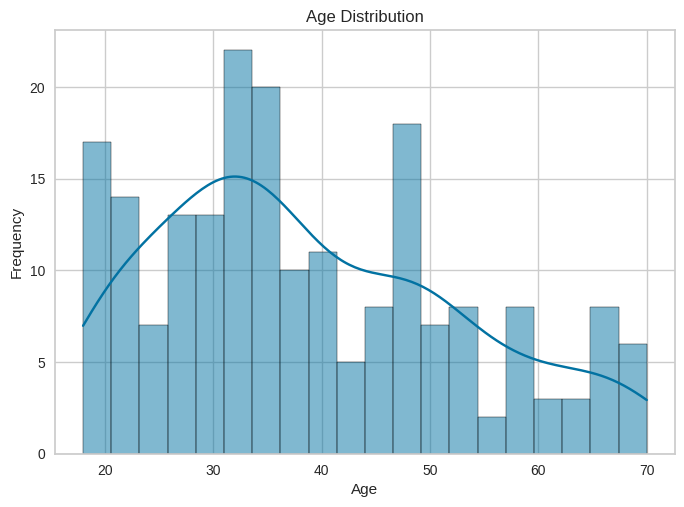

Correlation with 'Spending Score (1-100)':
CustomerID                0.006872
Gender                   -0.065682
Age                      -0.323599
Annual Income (k$)        0.010274
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64


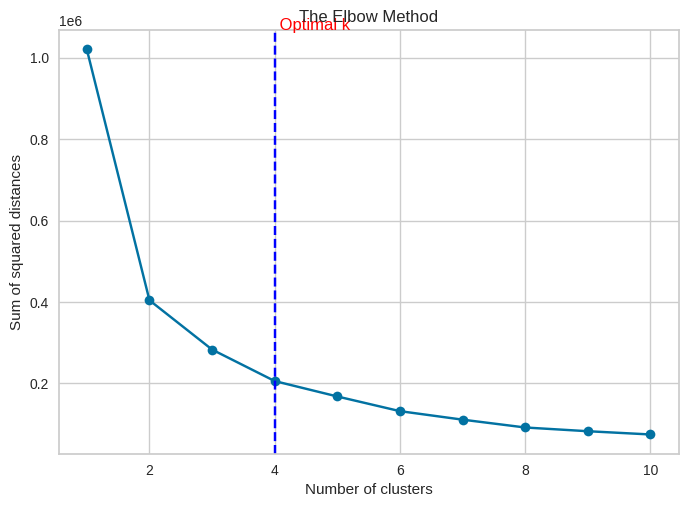

Average annual income of all customers: 61.31683168316832
Average spending score of male customers: 51.59649122807018
Cluster with the highest average income and spending score: Cluster                    3.00
Annual Income (k$)        87.80
Spending Score (1-100)    82.15
Name: 3, dtype: float64
Percentage of customers in Cluster 1: 18.7192118226601
Most frequent age group in Cluster 2: 19.0
Average income of customers in Cluster 3: 87.8
Count of values in each cluster:
Cluster
2    65
0    60
3    40
1    38
Name: count, dtype: int64

Customers in Cluster 0:
    CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
0            1       1  19.0                15.0                      39   
1            2       1  21.0                15.0                      81   
2            3       0  20.0                16.0                       6   
3            4       0  23.0                16.0                      77   
4            5       0  31.0                17.0     

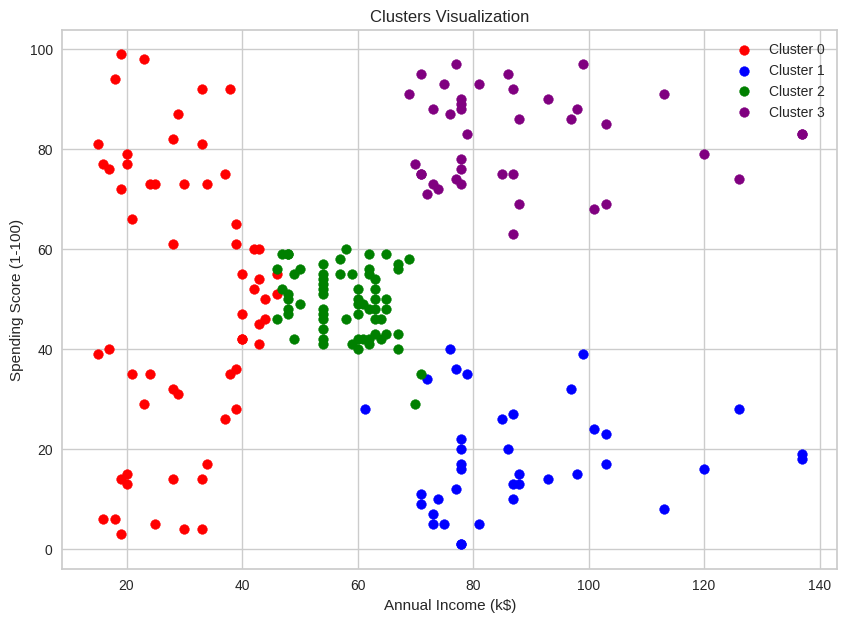

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
file_path = 'Mall_Customers - Mall_Customers.csv'
mall_customers = pd.read_csv(file_path)

#1 Features used in this dataset for customer segmentation?
print("Features used for customer segmentation:")
print(mall_customers.columns)

#2 The total no of missing values in the dataset Print missing values
print("Missing values in each column before handling:")
print(mall_customers.isnull().sum())

#3 Replace the missing values with mean in case of numerical feature and mode in case of categorical feature.
mall_customers['Age'].fillna(mall_customers['Age'].mean(), inplace=True)
mall_customers['Annual Income (k$)'].fillna(mall_customers['Annual Income (k$)'].mean(), inplace=True)
mall_customers['Gender'].fillna(mall_customers['Gender'].mode()[0], inplace=True)

# Print missing values after handling
print("Missing values in each column after handling:")
print(mall_customers.isnull().sum())

#4 Plot the distribution of 'Age'
sns.histplot(mall_customers['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Convert 'Gender' to numeric
mall_customers['Gender'] = pd.Categorical(mall_customers['Gender']).codes

#5 Calculate the correlation matrix
numeric_columns = mall_customers.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print("Correlation with 'Spending Score (1-100)':")
print(correlation_matrix['Spending Score (1-100)'])

#6 Elbow Method to determine the optimal number of clusters
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(numeric_columns)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 11), ssd, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

# Draw a vertical line at the elbow point
optimal_k = 4
plt.axvline(x=optimal_k, color='blue', linestyle='--')
plt.text(optimal_k, plt.ylim()[1], ' Optimal k', color = 'red')
plt.show()

# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=42)
mall_customers['Cluster'] = kmeans.fit_predict(numeric_columns)

#7 Average annual income of all customers
average_income = mall_customers['Annual Income (k$)'].mean()
print(f"Average annual income of all customers: {average_income}")

#8 Average spending score of male customers
average_spending_male = mall_customers[mall_customers['Gender'] == 0]['Spending Score (1-100)'].mean()  # Assuming 'Male' is coded as 0
print(f"Average spending score of male customers: {average_spending_male}")

#9 Cluster with the highest average income and spending score
cluster_summary = mall_customers.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()
highest_income_spending_cluster = cluster_summary.loc[
    cluster_summary[['Annual Income (k$)', 'Spending Score (1-100)']].sum(axis=1).idxmax()
]
print("Cluster with the highest average income and spending score:", highest_income_spending_cluster)

#10 Percentage of customers in Cluster 1
percentage_cluster_1 = (mall_customers['Cluster'] == 1).mean() * 100
print("Percentage of customers in Cluster 1:", percentage_cluster_1)


# 11. What is the most frequent age group in Cluster 2?
most_frequent_age_group_cluster2 = mall_customers[mall_customers['Cluster'] == 2]['Age'].mode()[0]
print("Most frequent age group in Cluster 2:", most_frequent_age_group_cluster2)

# 12. What is the average income of customers in Cluster 3?
average_income_cluster3 = mall_customers[mall_customers['Cluster'] == 3]['Annual Income (k$)'].mean()
print("Average income of customers in Cluster 3:", average_income_cluster3)

# 13. Show the count of value in each cluster.
print("Count of values in each cluster:")
print(mall_customers['Cluster'].value_counts())

# 14. Show customers from each cluster.
for cluster in range(4):
    print(f"\nCustomers in Cluster {cluster}:")
    print(mall_customers[mall_customers['Cluster'] == cluster])


#15. Make a visualization of the clusters.
plt.figure(figsize=(10, 7))

# Define colors for each cluster
cluster_colors = ['red', 'blue', 'green', 'purple']

# Scatter plot with different colors for each cluster
for cluster in range(4):
    plt.scatter(mall_customers[mall_customers['Cluster'] == cluster]['Annual Income (k$)'],
                mall_customers[mall_customers['Cluster'] == cluster]['Spending Score (1-100)'],
                c=cluster_colors[cluster],
                label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
